# Simple demonstration of mesureThermicite

This notebook shows a basic example of using the main function and visualizing the transmission curve and its area.

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from main import mesureThermicite

In [20]:
# Create smooth example data (sine wave)
x = np.linspace(770, 1430, 50)
y = 90 + 5 * np.sin((x-770)/660 * 2 * np.pi)
df_example = pd.DataFrame({
    "wavenumber": x,
    "transmission": y
})

# Save to CSV for function input
df_example.to_csv("example.csv", sep=";", index=False, header=False)

In [21]:
# Apply the main function
result = mesureThermicite("example.csv")
print("Result (area):", result)

Aire au-dessus de la courbe : 124183.45
Ratio aire/aire totale : 1.8816
Result (area): (np.float64(124183.44903435143), np.float64(1.8815674096113855))


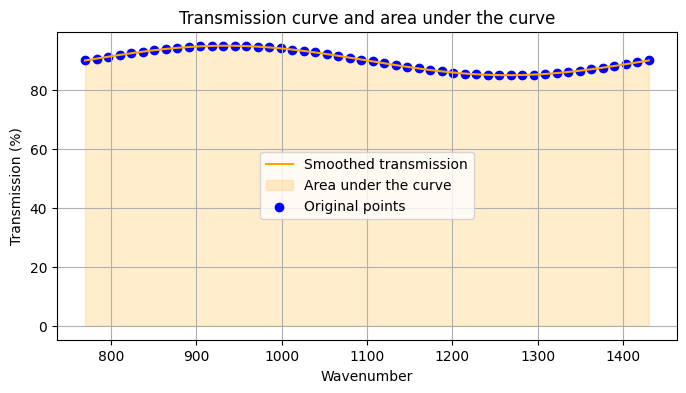

In [22]:
# Plot the transmission curve and area under the curve
x = df_example["wavenumber"]
y = df_example["transmission"]
xnew = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(xnew)
plt.figure(figsize=(8,4))
plt.plot(xnew, y_smooth, label="Smoothed transmission", color='orange')
plt.fill_between(xnew, y_smooth, alpha=0.2, color='orange', label="Area under the curve")
plt.scatter(x, y, color='blue', label="Original points")
plt.title("Transmission curve and area under the curve")
plt.xlabel("Wavenumber")
plt.ylabel("Transmission (%)")
plt.legend()
plt.grid(True)
plt.show()